# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target.

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [120]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [121]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

### Missing Values and inconsistencies

In [122]:
# Check for missing values
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

In [123]:
# Explore unique values in 'Age' column
np.sort(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 89, 90, 91, 92, 93, 94, 99])

In [124]:
# Missing Values and inconsistencies
for col in ['Department Name', 'Division Name', 'Class Name']:
    print(f"Column: {col}")
    print(f'Unique values: {np.sort(df[col].unique())}')
    print("\n")

Column: Department Name
Unique values: ['Bottoms' 'Dresses' 'Intimate' 'Jackets' 'Tops' 'Trend']


Column: Division Name
Unique values: ['General' 'General Petite']


Column: Class Name
Unique values: ['Blouses' 'Casual bottoms' 'Dresses' 'Fine gauge' 'Jackets' 'Jeans'
 'Knits' 'Lounge' 'Outerwear' 'Pants' 'Shorts' 'Skirts' 'Sweaters' 'Trend']




In [125]:
for col in ['Title', 'Review Text']:
    print(f"Column: {col}")
    print(f'Number of unique values: {df[col].nunique()}')
    print("\n")

Column: Title
Number of unique values: 13142


Column: Review Text
Number of unique values: 18439




No inconsistences were found. The data seems ok!

### Univariate Analysis

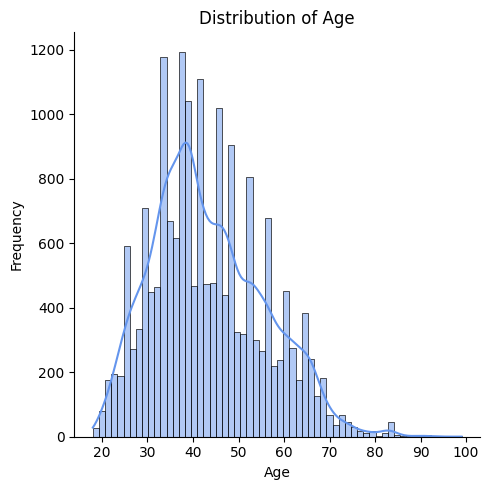

In [126]:
sns.displot(df['Age'], color='cornflowerblue', kde=True)
plt.title(f'Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

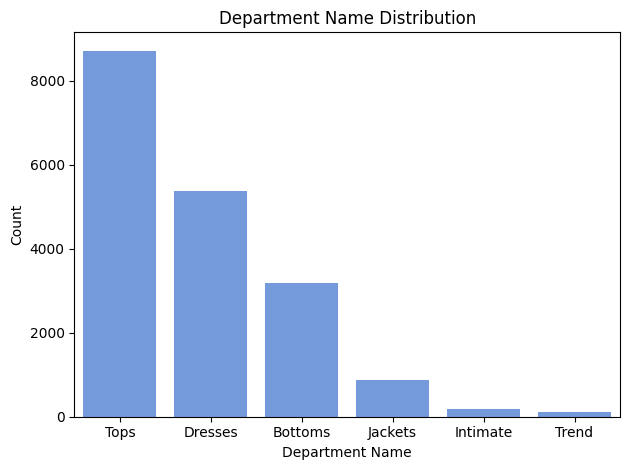

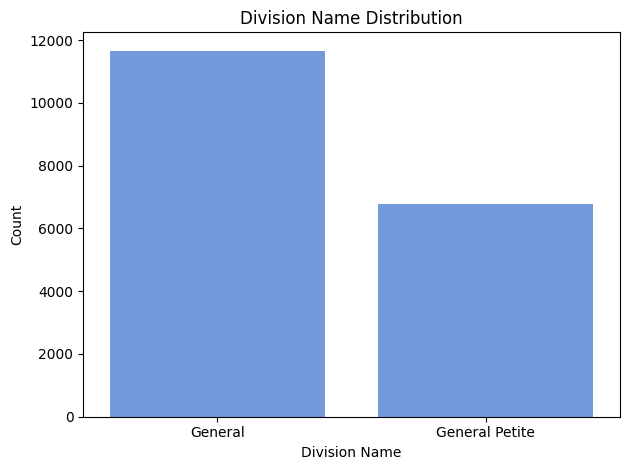

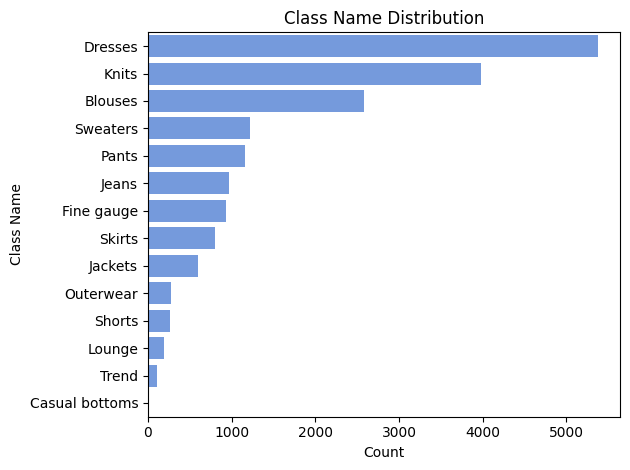

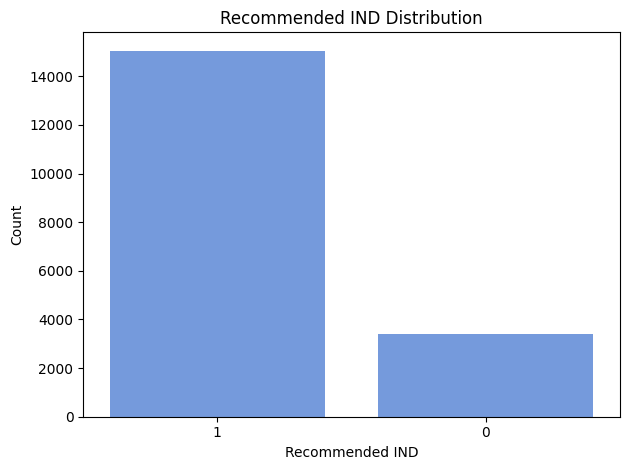

In [127]:

for col in ['Department Name', 'Division Name', 'Class Name', 'Recommended IND']:
    if df[col].nunique() <= 10:
        # Vertical plot
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index,
            color='cornflowerblue'
        )
    else:
        # Horizontal plot
        sns.countplot(
            data=df,
            y=col,
            order=df[col].value_counts().index,
            color='cornflowerblue'
        )

    plt.title(f'{col} Distribution')
    plt.xlabel(col if df[col].nunique() <= 10 else 'Count')
    plt.ylabel('Count' if df[col].nunique() <= 10 else col)
    plt.tight_layout()
    plt.show()

### Bivariate Analysis

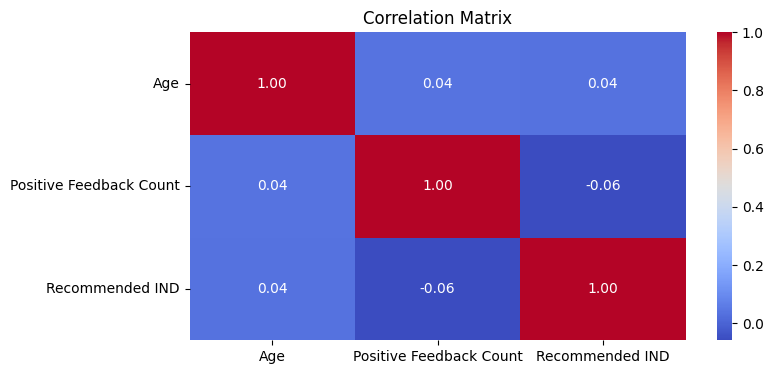

In [128]:
corr_matrix = df[['Age', 'Positive Feedback Count', 'Recommended IND']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

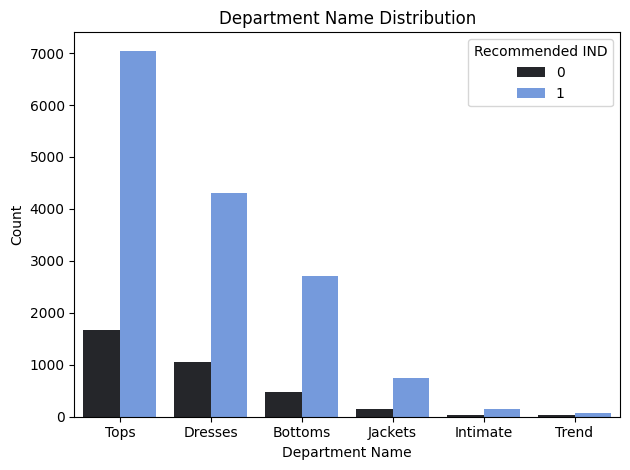

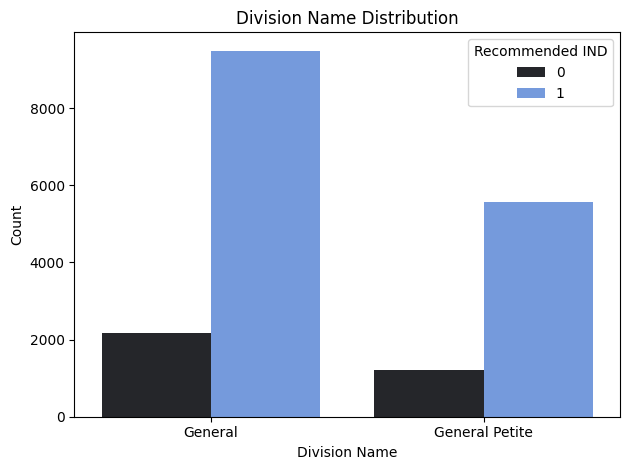

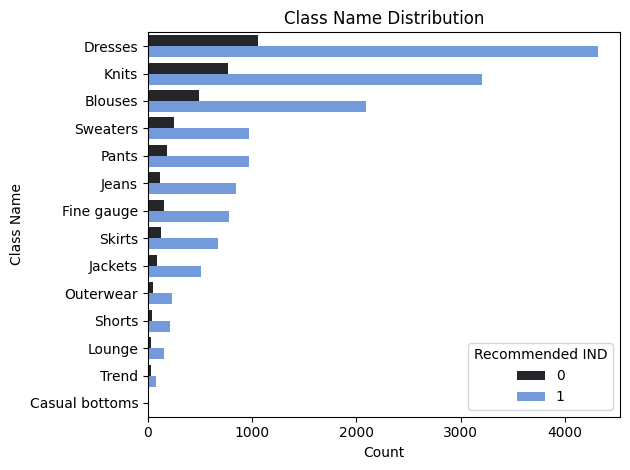

In [129]:
for col in ['Department Name', 'Division Name', 'Class Name']:
    if df[col].nunique() <= 10:
        # Vertical plot
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index,
            palette='dark:cornflowerblue',
            hue='Recommended IND'
        )
    else:
        # Horizontal plot
        sns.countplot(
            data=df,
            y=col,
            order=df[col].value_counts().index,
            palette='dark:cornflowerblue',
            hue='Recommended IND'
        )

    plt.title(f'{col} Distribution')
    plt.xlabel(col if df[col].nunique() <= 10 else 'Count')
    plt.ylabel('Count' if df[col].nunique() <= 10 else col)
    plt.tight_layout()
    plt.show()

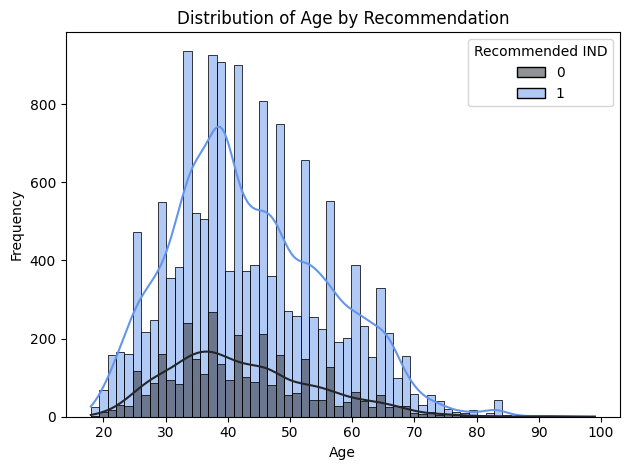

In [130]:
sns.histplot(
    data = df,
    x = 'Age',
    palette='dark:cornflowerblue', 
    kde=True, 
    hue='Recommended IND')
plt.title(f'Distribution of Age by Recommendation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Text Analysis

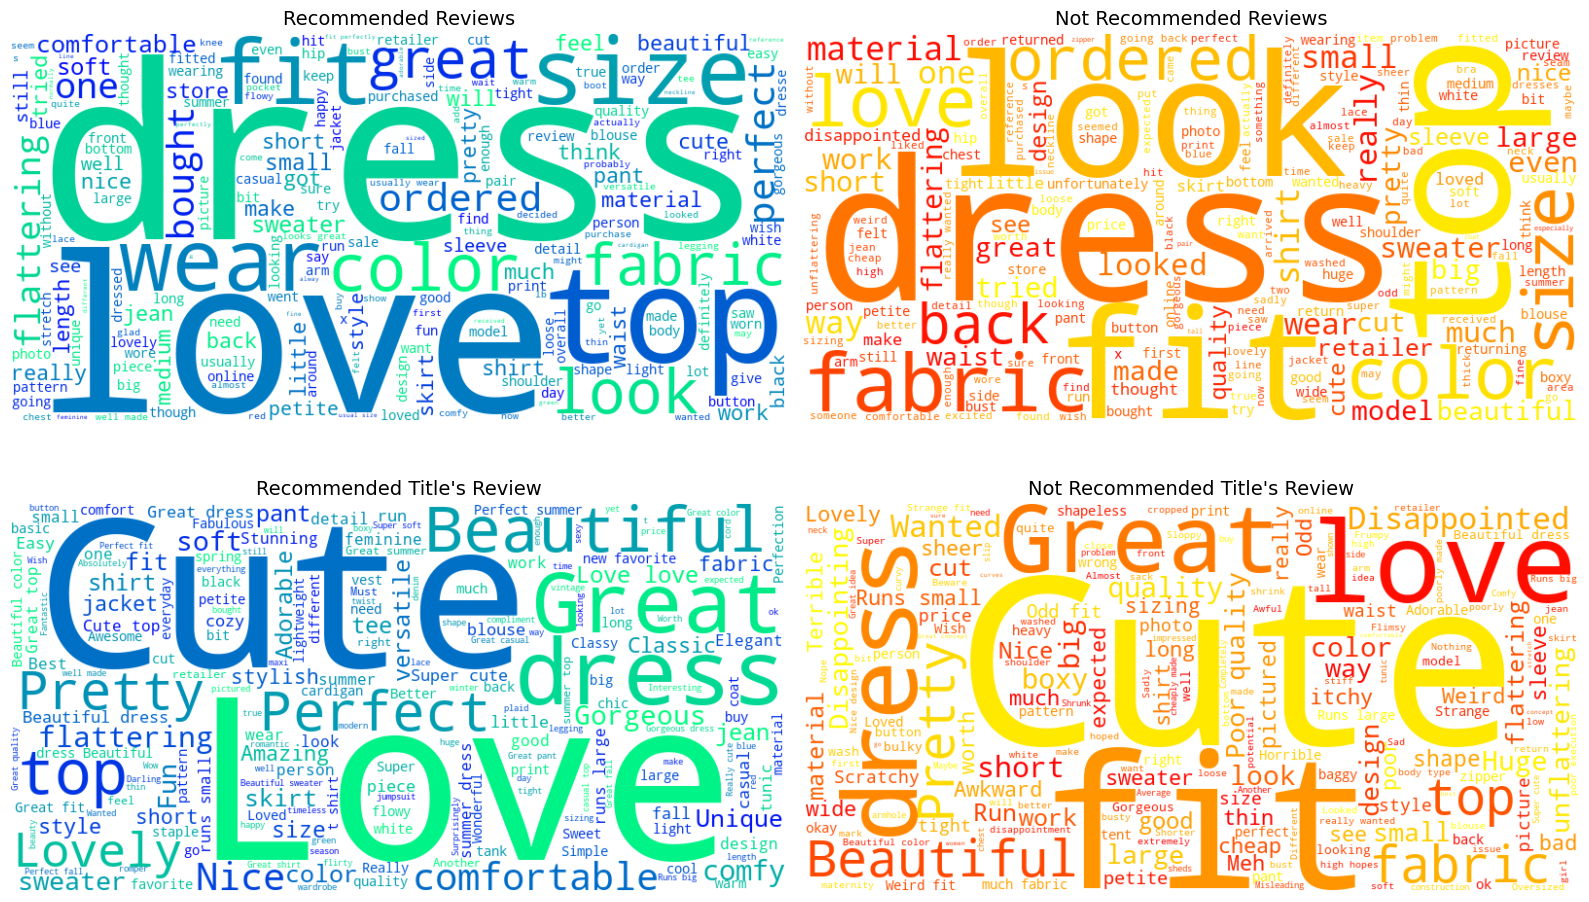

In [131]:
from wordcloud import WordCloud

# Prepare text data for word clouds
recommended_review = ' '.join(df[df['Recommended IND'] == 1]['Review Text'])
not_recommended_review = ' '.join(df[df['Recommended IND'] == 0]['Review Text'])

recommended_title = ' '.join(df[df['Recommended IND'] == 1]['Title'])
not_recommended_title = ' '.join(df[df['Recommended IND'] == 0]['Title'])


# Generate word clouds
wc_recommended_review = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(recommended_review)
wc_not_recommended_review = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(not_recommended_review)
wc_recommended_title = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(recommended_title)
wc_not_recommended_title = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(not_recommended_title)

# Plot word clouds
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].imshow(wc_recommended_review, interpolation='bilinear')
axes[0, 0].set_title('Recommended Reviews', fontsize=14)
axes[0, 0].axis('off')

axes[0, 1].imshow(wc_not_recommended_review, interpolation='bilinear')
axes[0, 1].set_title('Not Recommended Reviews', fontsize=14)
axes[0, 1].axis('off')

axes[1, 0].imshow(wc_recommended_title, interpolation='bilinear')
axes[1, 0].set_title('Recommended Title\'s Review', fontsize=14)
axes[1, 0].axis('off')

axes[1, 1].imshow(wc_not_recommended_title, interpolation='bilinear')
axes[1, 1].set_title('Not Recommended Title\'s Review', fontsize=14)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [132]:
for i in range(5):
    information = df.sample(1)[['Title', 'Review Text', 'Recommended IND']].values[0]
    print(f"""
    Example Review {i+1}:
    Title: {information[0]}
    Review Text: {information[1]}
    Overall Recommendation: {'Recommended' if information[2] == 1 else 'Not Recommended'}\n
    """)


    Example Review 1:
    Title: Nice top for flat chested
    Review Text: This top has nice quality lace but the layout is strange! it wouldn't stay under my boobs but kept creeping up and looked strange! not for girls with a chest!
    Overall Recommendation: Not Recommended

    

    Example Review 2:
    Title: Not my cup of tee
    Review Text: It fits super baggy everywhere and looked sloppy on me.
    Overall Recommendation: Not Recommended

    

    Example Review 3:
    Title: Body con
    Review Text: This dress is extremely body conscious. so if you want to make an impression, wear this dress. the fabric is thick and best worn on a cooler night. the pattern is gorgeously done, pieced together like a garment three times the cost. the cut of the armholes might not be flattering on those with broad shoulders or chubby upper arms (like myself). for me this dress is tts but way too long, so i will have to hem.
    Overall Recommendation: Recommended

    

    Example Review 

Based on the data exploration:

- There is a noticeable *class imbalance*, with about 80% of reviews recommending products (value 1) and 20% not recommending (value 0).
- The *Age Distribution* is relatively consistent between both groups, indicating that age alone is not a strong predictor of recommendation.
- Recommendation rates vary across departments, suggesting that product type influences customer satisfaction.
- **Recommended reviews frequently** include positive and emotionally expressive words such as *love, great, cute, perfect, and beautiful*, indicating strong customer satisfaction.
- **Not recommended reviews** often contain terms like fit, looked, small, returned, and disappointed, highlighting issues related to size, fitting, and unmet expectations.
- Both groups frequently mention clothing-related terms like *dress, top, and fabric,* suggesting these are key product types driving customer opinions.

## Building Pipeline

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import spacy

In [134]:
# SpaCy model for NLP processing
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model...")
    import sys
    import subprocess
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')
    print("SpaCy model downloaded and loaded.")

In [135]:
# Identify column types
num_features = ['Age', 'Positive Feedback Count']
cat_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_features = ['Review Text', 'Title']

In [136]:
class SpacyTokenizer(BaseEstimator, TransformerMixin):
    """
    Transformer that performs tokenization using spaCy.
    
    Parameters
    ----------
    model : str, default="en_core_web_sm"
        Name of the spaCy language model to use.
    lowercase : bool, default=True
        Whether to convert tokens to lowercase.
    remove_stopwords : bool, default=True
        Whether to remove stopwords.
    remove_punct : bool, default=True
        Whether to remove punctuation tokens.
    
    Returns
    -------
    list of list of str
        A list where each element is a list of tokens for one document.
    """
    def __init__(self, model="en_core_web_sm", lowercase=True, remove_stopwords=True, remove_punct=True):
        self.model = model
        self.lowercase = lowercase
        self.remove_stopwords = remove_stopwords
        self.remove_punct = remove_punct
        self.nlp = spacy.load(model)
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        tokenized_docs = []
        for doc in self.nlp.pipe(X, disable=["parser", "ner"]):
            tokens = []
            for token in doc:
                if self.remove_punct and token.is_punct:
                    continue
                if self.remove_stopwords and token.is_stop:
                    continue
                text = token.text.lower() if self.lowercase else token.text
                tokens.append(text)
            tokenized_docs.append(tokens)
        return tokenized_docs


class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    """
    Transformer that performs lemmatization using spaCy.
    
    Parameters
    ----------
    model : str, default="en_core_web_sm"
        Name of the spaCy model to use.
    lowercase : bool, default=True
        Whether to convert lemmas to lowercase.
    
    Notes
    -----
    - If input is a list of tokens, it joins them into text before processing.
    - Lemmatization helps reduce inflected words to their root forms.
    
    Returns
    -------
    list of list of str
        List of lists containing lemmatized tokens.
    """
    def __init__(self, model="en_core_web_sm", lowercase=True):
        self.model = model
        self.lowercase = lowercase
        self.nlp = spacy.load(model)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized_docs = []
        for item in X:
            if isinstance(item, list):
                text = " ".join(item)
            else:
                text = item
            doc = self.nlp(text)
            lemmas = [token.lemma_.lower() if self.lowercase else token.lemma_ 
                      for token in doc if not token.is_punct]
            lemmatized_docs.append(lemmas)
        return lemmatized_docs


def combine_text_columns(X):
    """
    Combine all columns into a single string per row.

    Parameters
    ----------
    X : pandas.DataFrame
        Input DataFrame containing text columns to be combined.

    Returns
    -------
    pandas.Series
        Series where each row is a single string obtained by concatenating all columns.
    """
    X_filled = X.fillna('')            # replace NaN with empty string
    combined = X_filled.agg(' '.join, axis=1)  # concatenate all columns row-wise
    return combined


def identity_analyzer(tokens):
    """
    Identity function for CountVectorizer analyzer.

    Parameters
    ----------
    tokens : list of str
        Tokenized text.

    Returns
    -------
    list of str
        Returns the input tokens unchanged.
    """
    return tokens

In [137]:
# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

# Text pipeline
text_pipeline = Pipeline([
    ('combine', FunctionTransformer(combine_text_columns, validate=False)),
    ('tokenizer', SpacyTokenizer()),
    ('lemmatizer', SpacyLemmatizer()),
    ('vectorizer', CountVectorizer(analyzer=identity_analyzer))
])

In [138]:
# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('text', text_pipeline, text_features)
    ],
    remainder='drop'  # Drop any column not mentioned explicitly
)

In [139]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42,
        class_weight='balanced',  # Handle class imbalance
        n_jobs=-1  # Use all available cores
    ))
])

rf_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [140]:
# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1 # Use all available cores
    ))
])

xgb_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Training Pipeline and Evaluation

In [141]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [142]:
xgb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }
    return metrics

def display_metrics(metrics, title=None):
    if title:
        print(title)
    print('Model Evaluation Metrics:')
    for name, value in metrics.items():
        print(f'{name}: {value:.4f}')

In [144]:
eval_rf = evaluate_classifier(rf_pipeline, X_test, y_test)
eval_xgb = evaluate_classifier(xgb_pipeline, X_test, y_test)

display_metrics(eval_rf, title='Random Forest Performance')
print('\n' + '='*50 + '\n')
display_metrics(eval_xgb, title='XGBoosting Performance')

Random Forest Performance
Model Evaluation Metrics:
Accuracy: 0.8618
Precision: 0.8575
Recall: 0.8618
F1-score: 0.8321


XGBoosting Performance
Model Evaluation Metrics:
Accuracy: 0.8688
Precision: 0.8573
Recall: 0.8688
F1-score: 0.8524


## Fine-Tuning Pipeline

In [145]:
from sklearn.model_selection import RandomizedSearchCV

### Random Forest fine-tuninng

In [146]:
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [20, 30, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2'],
}

In [147]:
random_search_rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=5,
    scoring='f1_weighted',
    cv=3,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_
print(f'Best Parameters Found: {random_search_rf.best_params_}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters Found: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}


In [148]:
eval_best_rf = evaluate_classifier(best_rf_model, X_test, y_test)
display_metrics(eval_best_rf, title='Tuned Random Forest Performance')

Tuned Random Forest Performance
Model Evaluation Metrics:
Accuracy: 0.8705
Precision: 0.8878
Recall: 0.8705
F1-score: 0.8765


### XGBoost fine-tuning

In [149]:
# Parameter grid based on XGBoost
xgb_param_dist = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0],
    }

In [150]:
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=5,
    scoring='f1_weighted',
    cv=3,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)
best_xgb_model = random_search_xgb.best_estimator_
print(f"Best Parameters Found: {random_search_xgb.best_params_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters Found: {'classifier__subsample': 0.8, 'classifier__n_estimators': 200, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1}


In [151]:
eval_best_xgb = evaluate_classifier(best_xgb_model, X_test, y_test)
display_metrics(eval_best_xgb, title='Tuned Random XGBoost Performance')

Tuned Random XGBoost Performance
Model Evaluation Metrics:
Accuracy: 0.8813
Precision: 0.8724
Recall: 0.8813
F1-score: 0.8719


## Conclusion

In [152]:
import joblib

# saving pipelines for further use
joblib.dump(best_rf_model, 'models/random_forest_pipeline.pkl')
joblib.dump(best_xgb_model, 'models/xgb_model_pipeline.pkl')

['models/xgb_model_pipeline.pkl']

Based on the evaluation metrics, both models demonstrate strong and comparable performance. The Tuned XGBoost achieved slightly higher accuracy (0.8813) and recall (0.8813), indicating better overall classification and sensitivity to true positives. On the other hand, the Tuned Random Forest obtained a marginally higher precision (0.8878) and F1-score (0.8765), showing more balanced performance between precision and recall. Overall, both models perform well, with XGBoost showing a slight advantage.